<a href="https://colab.research.google.com/github/Ecstarssyy/Machine-Learning-Optiz/blob/main/EDA_OptiZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Mengatur style visualisasi agar lebih menarik
sns.set_style('whitegrid')

#Muat dataset
file_path = '/content/drive/My Drive/ColabNotebooks/Fashion_Retail_Sales.csv'

df = pd.read_csv(file_path)

# Tampilkan 5 baris pertama, info dataset
print("5 Baris Pertama Data:")
print(df.head())
print("\n \nInformasi Dataset:")
df.info()

5 Baris Pertama Data:
   Customer Reference ID Item Purchased  Purchase Amount (USD) Date Purchase  \
0                   4018        Handbag                 4619.0    2023-02-05   
1                   4115          Tunic                 2456.0    2023-07-11   
2                   4019       Tank Top                 2102.0    2023-03-23   
3                   4097       Leggings                 3126.0    2023-03-15   
4                   3997         Wallet                 3003.0    2022-11-27   

   Review Rating Payment Method  
0            NaN    Credit Card  
1            2.0    Credit Card  
2            4.1           Cash  
3            3.2           Cash  
4            4.7           Cash  

 
Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item

In [ ]:
# Ubah kolom 'Date Purchase' ke format datetime
df['Date Purchase'] = pd.to_datetime(df['Date Purchase'])

# Cek kembali tipe data untuk memastikan perubahannya berhasil
print("\nInformasi Dataset Setelah Konversi Tanggal:")
df.info()



Informasi Dataset Setelah Konversi Tanggal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer Reference ID  3400 non-null   int64         
 1   Item Purchased         3400 non-null   object        
 2   Purchase Amount (USD)  2750 non-null   float64       
 3   Date Purchase          3400 non-null   datetime64[ns]
 4   Review Rating          3076 non-null   float64       
 5   Payment Method         3400 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 159.5+ KB


Date Purchase diubah ke bentuk datetimeindex

In [ ]:
print("\n \nJumlah Missing Value Per Kolom:")
df.isnull().sum()



 
Jumlah Missing Value Per Kolom:


,0
Customer Reference ID,0
Item Purchased,0
Purchase Amount (USD),650
Date Purchase,0
Review Rating,324
Payment Method,0


In [ ]:
# Mengecek jumlah duplikat
duplicate_count = df.duplicated().sum()

# Menampilkan jumlah duplikat
print(f'Jumlah baris duplikat: {duplicate_count}')

Jumlah baris duplikat: 0


Dapat dilihat nilai Missing Value dari kolom Purchase Amount dan Review Rating. Oleh karena itu dilakukan Pembersihan Missing Value dengan mencoba metode MICE

In [ ]:
#  Menghitung jumlah missing values per kolom
missing_data = df.isnull().sum()

# Menghitung persentase missing values per kolom
missing_percentage = (missing_data / len(df)) * 100

# Menampilkan hasil
print(missing_percentage)

Customer Reference ID     0.000000
Item Purchased            0.000000
Purchase Amount (USD)    19.117647
Date Purchase             0.000000
Review Rating             9.529412
Payment Method            0.000000
dtype: float64


tidak bisa menghilangkan baris yang memiliki missing value karena batasnya untuk dihapus itu adalah 5-6% dari dataset.
Sumber: https://www.youtube.com/watch?v=CbH2_BfT_Ig

In [ ]:
df.describe(include="all")

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
count,3400.000000,3400,2750.000000,3400,3076.000000,3400
unique,NaN,50,NaN,NaN,NaN,2
top,NaN,Belt,NaN,NaN,NaN,Credit Card
freq,NaN,90,NaN,NaN,NaN,1770
mean,4039.660588,NaN,156.709818,2023-04-01 01:40:22.588235520,2.999057,NaN
min,3957.000000,NaN,10.000000,2022-10-02 00:00:00,1.000000,NaN
25%,3997.000000,NaN,57.000000,2022-12-31 00:00:00,2.000000,NaN
50%,4040.000000,NaN,110.000000,2023-04-03 00:00:00,3.000000,NaN
75%,4081.000000,NaN,155.750000,2023-07-02 00:00:00,4.000000,NaN
max,4122.000000,NaN,4932.000000,2023-10-01 00:00:00,5.000000,NaN


In [ ]:
# Ganti missing value dengan polarisasi linear
df['Date Purchase'] = pd.to_datetime(df['Date Purchase'])
df = df.sort_values('Date Purchase')

# Interpolasi linear untuk missing value
df['Purchase Amount (USD)'] = df['Purchase Amount (USD)'].interpolate(method='linear')
df['Review Rating'] = df['Review Rating'].interpolate(method='linear')

df = df[df['Purchase Amount (USD)'].notna()]

In [ ]:
df.describe(include="all")

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
count,3400.000000,3400,3400.000000,3400,3400.000000,3400
unique,NaN,50,NaN,NaN,NaN,2
top,NaN,Belt,NaN,NaN,NaN,Credit Card
freq,NaN,90,NaN,NaN,NaN,1770
mean,4039.660588,NaN,157.720294,2023-04-01 01:40:22.588235264,2.993456,NaN
min,3957.000000,NaN,10.000000,2022-10-02 00:00:00,1.000000,NaN
25%,3997.000000,NaN,62.458333,2022-12-31 00:00:00,2.000000,NaN
50%,4040.000000,NaN,109.000000,2023-04-03 00:00:00,3.000000,NaN
75%,4081.000000,NaN,153.000000,2023-07-02 00:00:00,4.000000,NaN
max,4122.000000,NaN,4932.000000,2023-10-01 00:00:00,5.000000,NaN


In [ ]:
import pandas as pd
# Diasumsikan df adalah DataFrame Anda yang sudah dimuat dan dibersihkan

# 1. Pilih kolom numerik yang ingin dianalisis
kolom_numerik = ['Purchase Amount (USD)', 'Review Rating']

# 2. Buat dictionary untuk menampung semua hasil statistik
statistik = {
    'Mean (Rata-rata)': df[kolom_numerik].mean(),
    'Median (Nilai Tengah)': df[kolom_numerik].median(),
    'Standar Deviasi': df[kolom_numerik].std(),
    'Minimum': df[kolom_numerik].min(),
    'Maksimum': df[kolom_numerik].max(),
    'Skewness': df[kolom_numerik].skew(),
    'Kurtosis': df[kolom_numerik].kurt()
}

# 3. Ubah dictionary menjadi DataFrame
tabel_statistik = pd.DataFrame(statistik)

# 4. Transpose DataFrame (menukar baris dan kolom)
tabel_final = tabel_statistik.T # <--- CUKUP TAMBAHKAN .T DI SINI

# 5. Tampilkan tabelnya
print("Tabel Statistik Deskriptif untuk Laporan (Setelah Transpose)")
display(tabel_final)

Tabel Statistik Deskriptif untuk Laporan (Setelah Transpose)


,Purchase Amount (USD),Review Rating
Mean (Rata-rata),157.720294,2.993456
Median (Nilai Tengah),109.000000,3.000000
Standar Deviasi,402.060061,1.126745
Minimum,10.000000,1.000000
Maksimum,4932.000000,5.000000
Skewness,8.344102,-0.004215
Kurtosis,75.331600,-1.158095


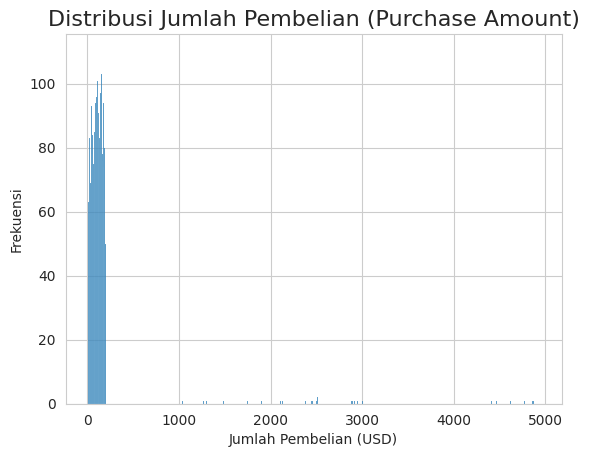

In [ ]:
# Sel untuk Histogram Purchase Amount
sns.histplot(data=df, x='Purchase Amount (USD)', kde=False, bins=1000)
plt.title('Distribusi Jumlah Pembelian (Purchase Amount)', fontsize=16)
plt.xlabel('Jumlah Pembelian (USD)')
plt.ylabel('Frekuensi')
plt.show()

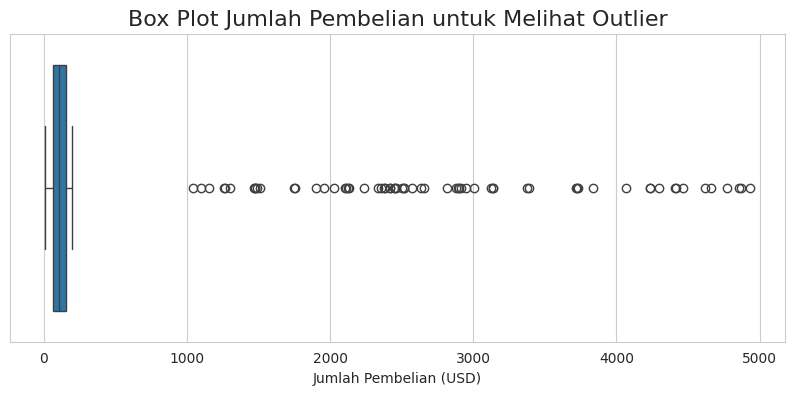

In [ ]:
# Sel 6: 1.1 Distribusi Jumlah Pembelian (Purchase Amount) - Box Plot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Purchase Amount (USD)'])
plt.title('Box Plot Jumlah Pembelian untuk Melihat Outlier', fontsize=16)
plt.xlabel('Jumlah Pembelian (USD)', fontsize=10)
plt.show()

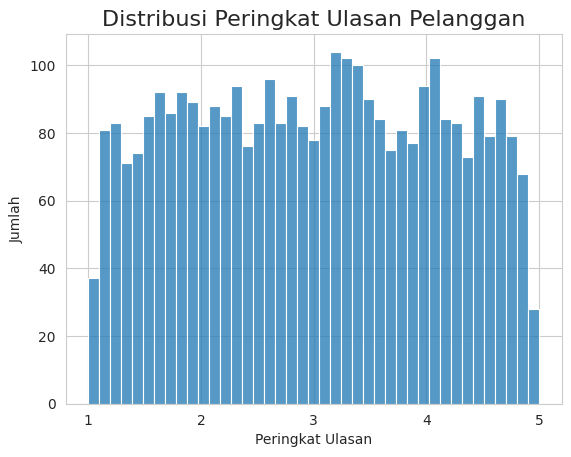

In [ ]:
# Sel untuk Histogram Review Rating
sns.histplot(data=df, x='Review Rating', bins=41, kde=False) # 'bins' bisa diatur untuk mengontrol pengelompokan
plt.title('Distribusi Peringkat Ulasan Pelanggan', fontsize=16)
plt.xlabel('Peringkat Ulasan')
plt.ylabel('Jumlah')
plt.xticks(range(1, 6)) # Memaksa sumbu-x hanya menampilkan label integer 1, 2, 3, 4, 5
plt.show()

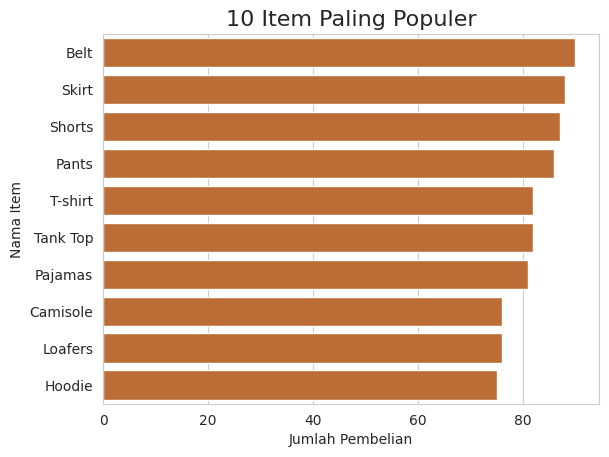

In [ ]:
# Sel untuk Bar Chart Item Purchased
# Mengambil 10 item paling populer
top_10_items = df['Item Purchased'].value_counts().nlargest(10).index

sns.countplot(
    data=df,
    y='Item Purchased',
    order=top_10_items,
    color='#D2691E',
    hue=None,
    legend=False
)
plt.title('10 Item Paling Populer', fontsize=16)
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Nama Item')
plt.show()

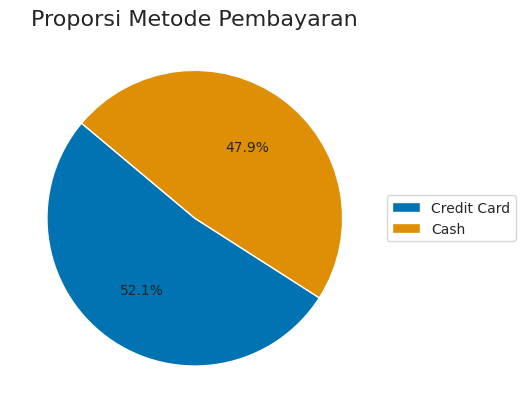

In [ ]:
payment_counts = df['Payment Method'].value_counts()

# Pie chart
plt.pie(
    payment_counts,
    autopct='%1.1f%%',  # Menampilkan persentase
    startangle=140,
    colors=sns.color_palette('colorblind')  # Anda bisa ganti dengan warna lain di bawah
)

# Menambahkan judul
plt.title('Proporsi Metode Pembayaran', fontsize=16)

# Menghilangkan label sumbu Y
plt.ylabel('')

# Menambahkan legenda di sisi kanan
plt.legend(
    labels=payment_counts.index,
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

# Menampilkan chart
plt.show()

dibawah ini untuk bivariat

In [ ]:
# Set 'Date Purchase' sebagai index
df = df.set_index('Date Purchase')

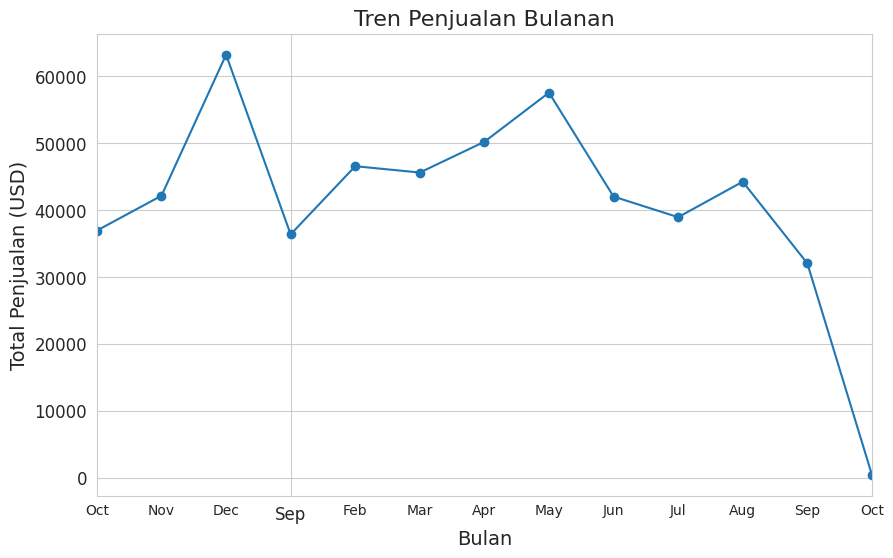

In [ ]:
import matplotlib.dates as mdates


# Pastikan 'Date Purchase' sudah menjadi index dan terurut
df_time = df.sort_index()

# Agregasi penjualan per bulan ('M')
monthly_sales = df_time['Purchase Amount (USD)'].resample('ME').sum()

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', linestyle='-', ax=ax)

# Mengatur format label sumbu X agar hanya menampilkan nama bulan
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format hanya menampilkan nama bulan

# Memperbesar ukuran font untuk label sumbu X dan Y
ax.tick_params(axis='x', labelsize=12)  # Mengatur ukuran font label sumbu X
ax.tick_params(axis='y', labelsize=12)  # Mengatur ukuran font label sumbu Y

# Menambahkan judul dan label sumbu
plt.title('Tren Penjualan Bulanan', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Total Penjualan (USD)', fontsize=14)
plt.grid(True)

# Menampilkan plot
plt.show()


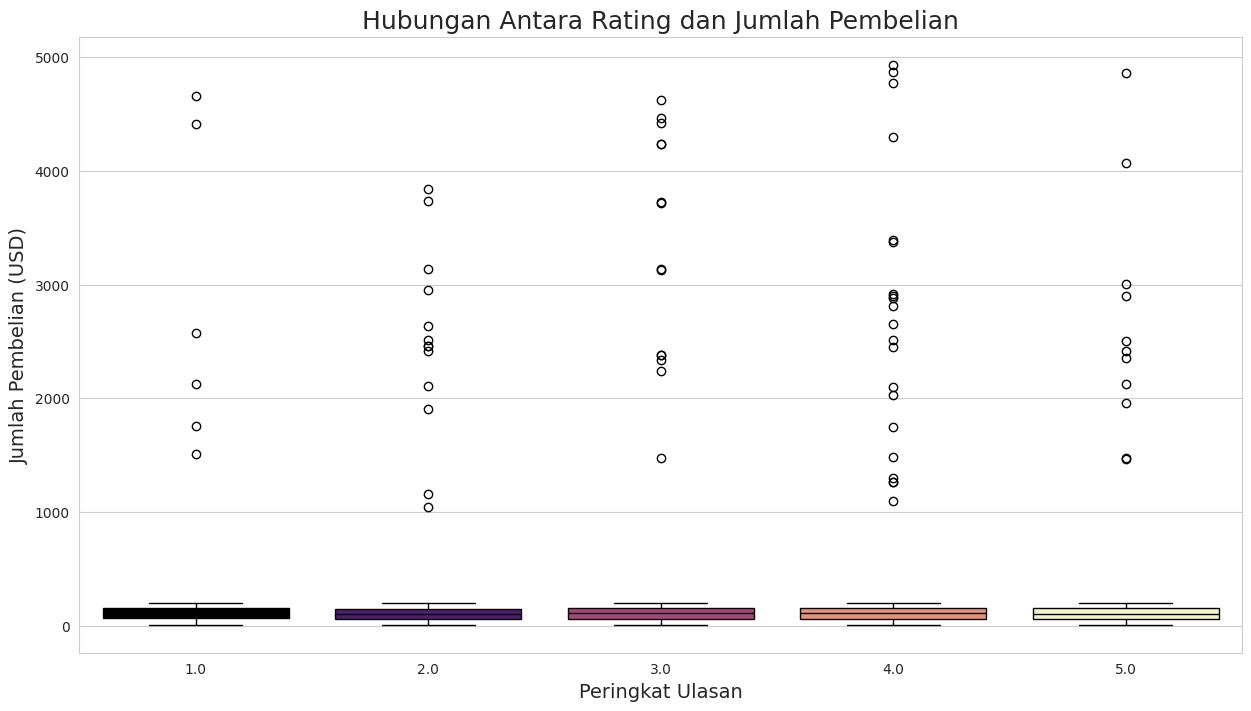

In [ ]:
# --- LANGKAH PERBAIKAN DATA ---
# Ganti nilai NaN dengan nilai rata-rata dari kolom 'Review Rating'
df.loc[:, 'Review Rating'] = df['Review Rating'].fillna(df['Review Rating'].mean())

# Pastikan 'Review Rating' menjadi integer setelah mengganti NaN dengan mean
df.loc[:, 'Review Rating'] = df['Review Rating'].round().astype(int)

# --- KODE VISUALISASI YANG DISEMPURNAKAN ---

# 1. Memperlebar ukuran gambar (misal: lebar 15, tinggi 8)
plt.figure(figsize=(15, 8))

# 2. Membuat Box Plot dengan data yang sudah bersih
sns.boxplot(data=df, x='Review Rating', y='Purchase Amount (USD)', hue='Review Rating', palette='magma', legend=False)

# 3. Memberi judul dan label
plt.title('Hubungan Antara Rating dan Jumlah Pembelian', fontsize=18)
plt.xlabel('Peringkat Ulasan', fontsize=14)
plt.ylabel('Jumlah Pembelian (USD)', fontsize=14)

# 4. (Opsional) Merotasi label di sumbu-x jika masih terlalu padat
# plt.xticks(rotation=45)

# 5. Menampilkan plot
plt.show()


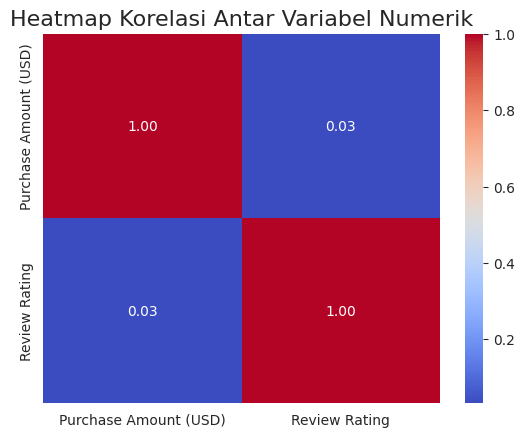

In [ ]:
# Sel untuk Heatmap Korelasi
# Pilih hanya kolom numerik
kolom_numerik = ['Purchase Amount (USD)', 'Review Rating']
df_numerik = df[kolom_numerik]

# Hitung matriks korelasi
correlation_matrix = df_numerik.corr()

# Buat heatmap
sns.heatmap(
    correlation_matrix,
    annot=True, # Menampilkan angka korelasi di dalam sel
    cmap='coolwarm', # Skema warna
    fmt='.2f' # Format angka menjadi 2 desimal
)
plt.title('Heatmap Korelasi Antar Variabel Numerik', fontsize=16)
plt.show()

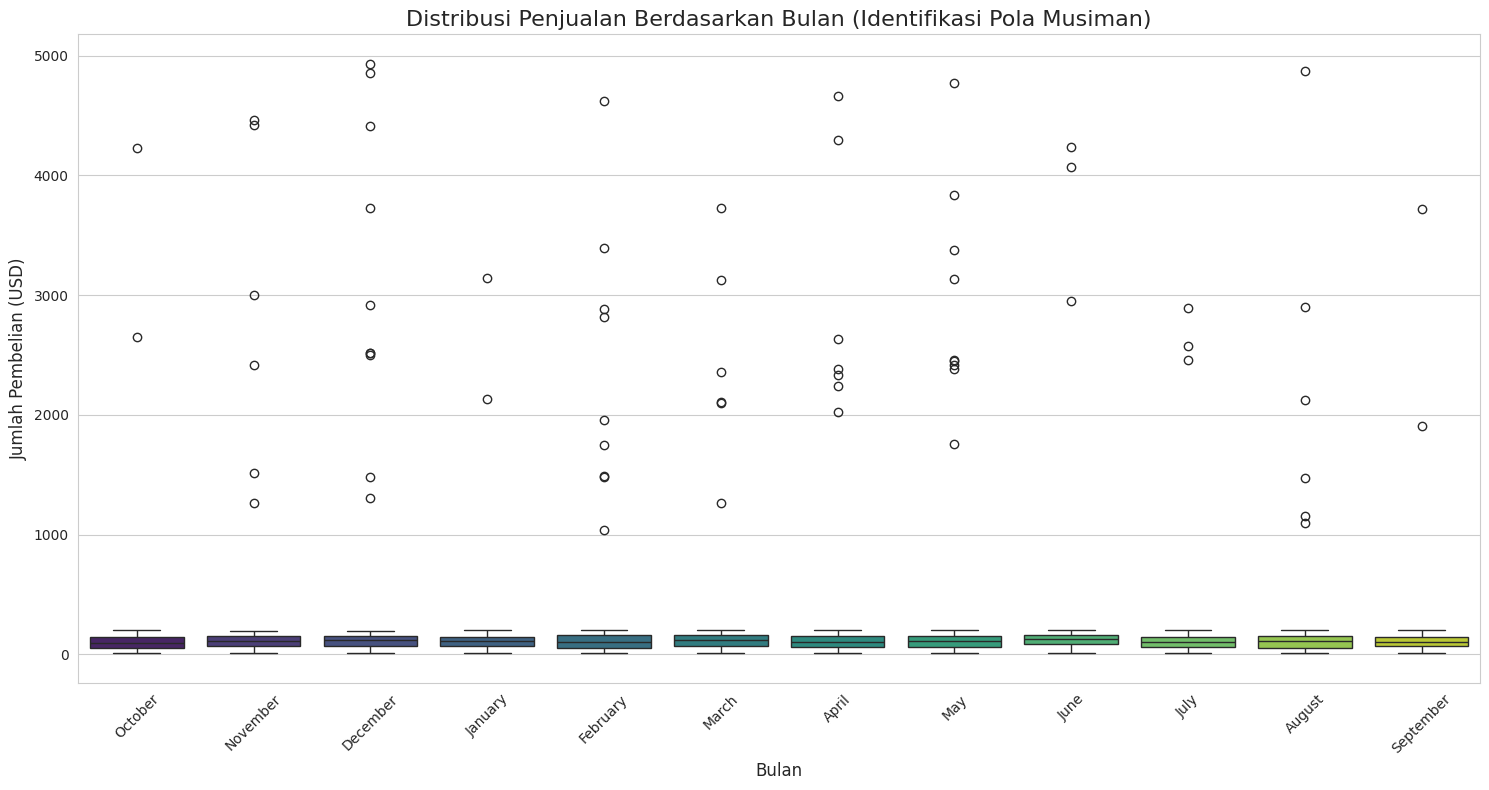

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat kolom 'Bulan' dari index datetime
df['Bulan'] = df.index.month_name()

# Tentukan urutan bulan kronologis
bulan_order = [
    'October', 'November', 'December', 'January', 'February', 'March',
    'April', 'May', 'June', 'July', 'August', 'September'
]

# Visualisasi Box Plot
plt.figure(figsize=(15, 8))  # Ukuran plot

sns.boxplot(
    data=df,
    x='Bulan',
    y='Purchase Amount (USD)',
    hue='Bulan',              # Diperlukan agar palette tidak memunculkan warning
    order=bulan_order,
    palette='viridis',
    legend=False              # Agar tidak muncul legenda yang tidak perlu
)

# Menambahkan judul dan label
plt.title('Distribusi Penjualan Berdasarkan Bulan (Identifikasi Pola Musiman)', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Pembelian (USD)', fontsize=12)
plt.xticks(rotation=45)  # Memutar label bulan agar tidak tumpang tindih
plt.tight_layout()
plt.show()

# Hapus kolom sementara 'Bulan' jika tidak diperlukan lagi
df.drop('Bulan', axis=1, inplace=True)


<ipython-input-103-9efc9402ca0d>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Purchase Amount (USD)'].resample('M').sum()


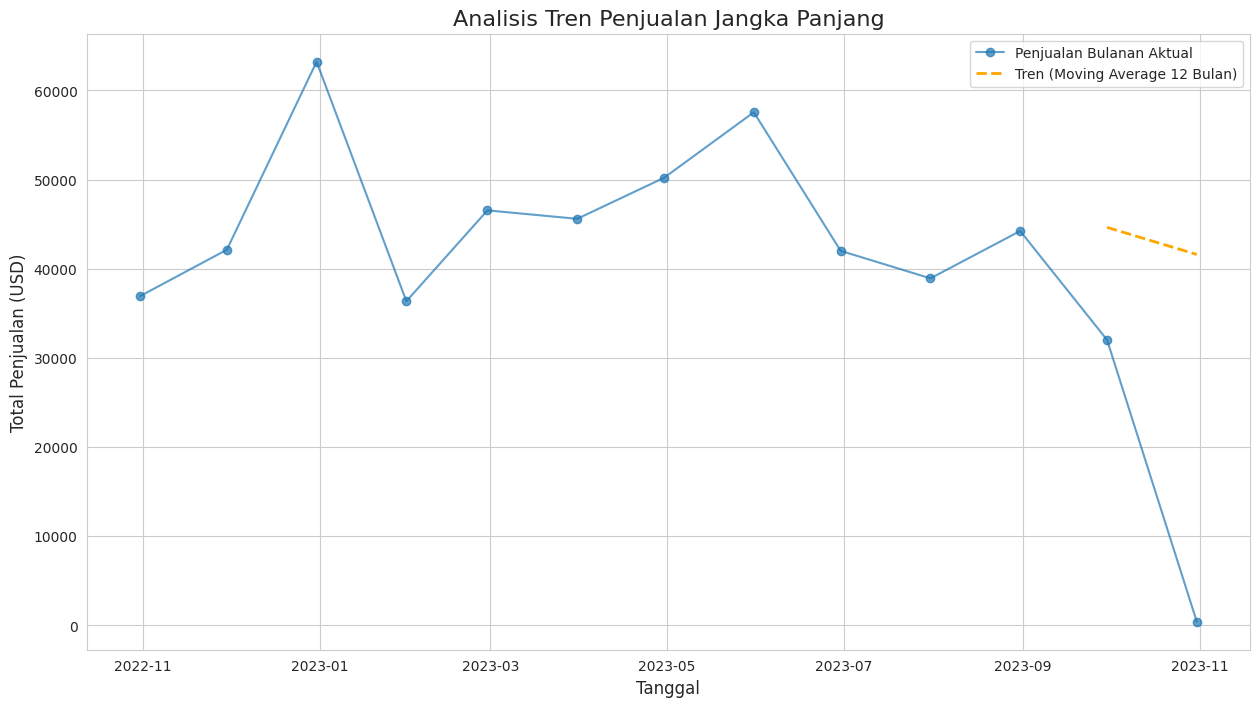

In [ ]:
# Sel untuk Grafik Analisis Tren

# Kita asumsikan 'df' adalah DataFrame Anda dengan DatetimeIndex
# Langkah 1: Agregasi data penjualan menjadi total per bulan
monthly_sales = df['Purchase Amount (USD)'].resample('M').sum()

# Langkah 2: Hitung Rata-Rata Bergerak (Moving Average) 12 bulan untuk melihat tren
# Window=12 karena data Anda memiliki siklus tahunan (12 bulan)
moving_average_12 = monthly_sales.rolling(window=12).mean()

# Langkah 3: Membuat visualisasi
plt.figure(figsize=(15, 8))

# Plot penjualan bulanan aktual
plt.plot(monthly_sales.index, monthly_sales, label='Penjualan Bulanan Aktual', marker='o', linestyle='-', alpha=0.7)

# Plot garis tren (moving average)
plt.plot(monthly_sales.index, moving_average_12, label='Tren (Moving Average 12 Bulan)', color='orange', linestyle='--', linewidth=2)

# Menambahkan judul, label, dan legenda
plt.title('Analisis Tren Penjualan Jangka Panjang', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Total Penjualan (USD)', fontsize=12)
plt.legend() # <-- Ini akan menampilkan legenda berdasarkan label yang kita set
plt.grid(True)
plt.show()